Variables



- `area:` The area of a bean zone and the number of pixels within its boundaries.
- `perimeter:` Bean circumference is defined as the length of its border.
- `majorAxisLength:` The distance between the ends of the longest line that can be drawn from a bean.
- `minorAxisLength:` The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- `aspectRatio:` Defines the relationship between the major and minor axis lengths.
- `eccentricity:` Eccentricity of the ellipse having the same moments as the region.
- `convexArea:` Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- `equivDiameter:` The diameter of a circle having the same area as a bean seed area.
- `extent:` The ratio of the pixels in the bounding box to the bean area.
- `solidity:` Also known as convexity, the ratio of the pixels in the convex shell to those found in beans.
- `roundness:` Calculated with the formula: (4 * π * Area) / (Perimeter^2).
- `compactness:` Measures the roundness of an object: EquivalentDiameter / MajorAxisLength.
- `shapeFactor1:` The ratio of Area to the square of Perimeter.
- `shapeFactor2:` The ratio of Area to the square of MajorAxisLength.
- `shapeFactor3:` The ratio of Area to the product of MajorAxisLength and MinorAxisLength.
- `shapeFactor4:` The ratio of Perimeter to the product of MajorAxisLength and MinorAxisLength.
- `class:` The class of the bean (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira).



**Import Necessary Libraries**

In [1]:
#Import Necessary Libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
#Import the data
df = pd.read_csv('dry_bean_dataset_.csv')

#  Display the number of rows and columns
print("Number of rows and columns:", df.shape)

#  Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (13611, 17)
First few rows of the dataset:


,area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor1,shape_factor2,shape_factor3,shape_factor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [9]:
#  Check for any missing values
print("Missing values in the dataset:")
print(df.isna().sum())

Missing values in the dataset:
area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
aspect_ratio         0
eccentricity         0
convex_area          0
equiv_diameter       0
extent               0
solidity             0
roundness            0
compactness          0
shape_factor1        0
shape_factor2        0
shape_factor3        0
shape_factor4        0
class                0
dtype: int64


In [10]:
#  Check the distribution of classes in the target variable
print("Distribution of classes in the target variable:")
print(df['class'].value_counts())

Distribution of classes in the target variable:
class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


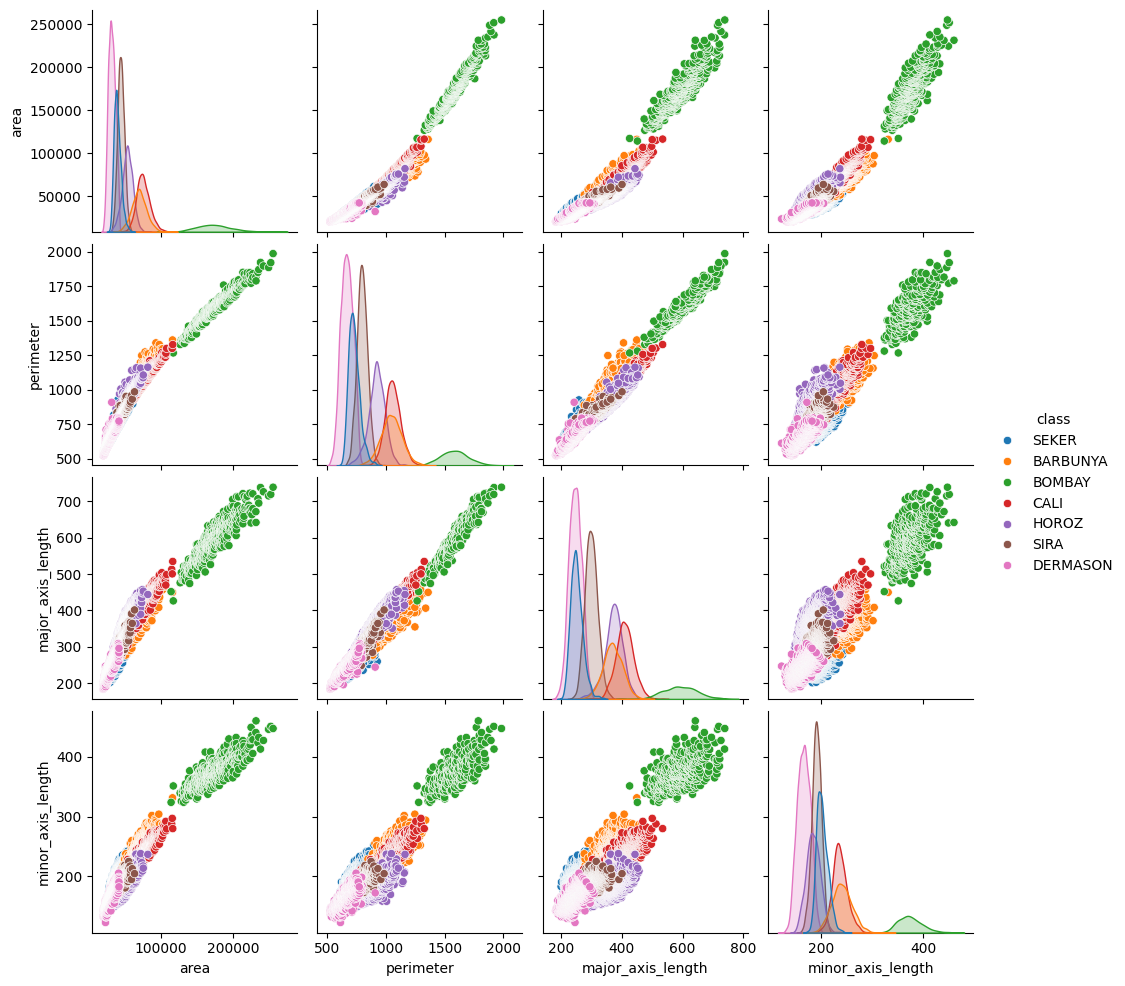

In [11]:
# Step 6: Visualize the distribution of features (area, perimeter, major_axis_length, minor_axis_length) using scatter plots.
sns.pairplot(df, vars=["area", "perimeter", "major_axis_length", "minor_axis_length"], hue="class")
plt.show()


###  Data Preprocessing



In [14]:
#  Select features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  Model Training and Evaluation Using Logistic Regression



In [15]:
#  Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report.
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.63      0.55      0.59       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.70      0.71      0.71       479
    DERMASON       0.81      0.86      0.83      1043
       HOROZ       0.65      0.59      0.62       588
       SEKER       0.67      0.63      0.65       619
        SIRA       0.60      0.66      0.63       799

    accuracy                           0.71      4084
   macro avg       0.72      0.71      0.72      4084
weighted avg       0.70      0.71      0.70      4084



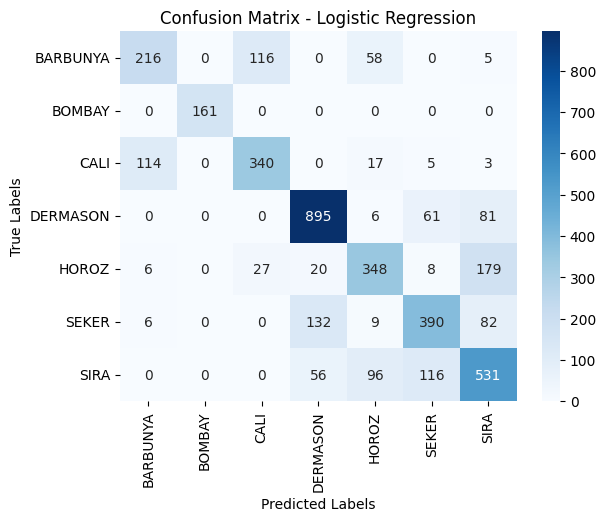

In [19]:
# Step 4: Plot the confusion matrix
classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

###  Train Logistic Regression with Specific Parameters

 Train a Logistic Regression model with specified parameters:
    - Max iterations: 300
    - Regularization strength (C): 0.5
    - 'tol': 0.001
    - class_weight: 'balanced'
<br></br>





In [20]:
#  Train a Logistic Regression model with specified parameters
lr_params = {
    'max_iter': 300, 
    'C': 0.5,
    'tol': 0.001,
    'class_weight': 'balanced'
}
lr_model_custom = LogisticRegression(**lr_params)
lr_model_custom.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_custom = lr_model_custom.predict(X_test)

In [21]:
#  Evaluate the model using a classification report
print("Classification Report with Specified Parameters:")
print(classification_report(y_test, y_pred_custom))

Classification Report with Specified Parameters:
              precision    recall  f1-score   support

    BARBUNYA       0.82      0.82      0.82       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.86      0.86      0.86       479
    DERMASON       0.88      0.80      0.84      1043
       HOROZ       0.86      0.87      0.86       588
       SEKER       0.68      0.82      0.74       619
        SIRA       0.80      0.75      0.77       799

    accuracy                           0.82      4084
   macro avg       0.84      0.85      0.84      4084
weighted avg       0.83      0.82      0.82      4084



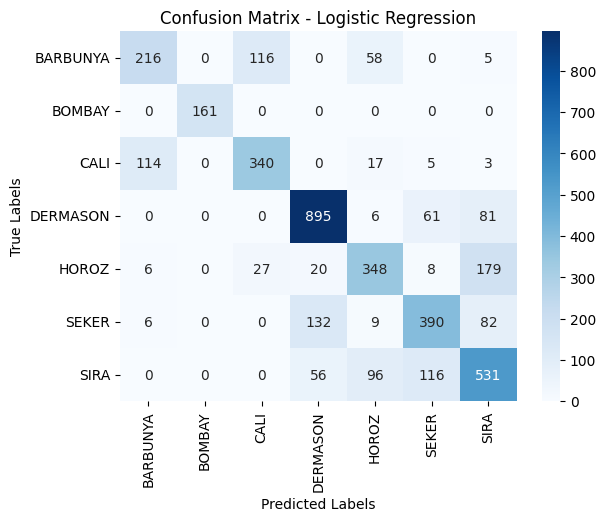

In [22]:
#  Plot the confusion matrix
classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Conclusion

 Here are the key findings:

**Default Logistic Regression Model:**
- Accuracy: 0.71
- The model with default parameters achieved an overall accuracy of 0.71.

**Logistic Regression Model with Specified Parameters:**
- Accuracy: 0.76
- Precision, Recall, and F1-score improved slightly for most classes.
- Specified parameters used: `max_iter=300`, `C=0.5`, `tol=0.001`, `class_weight='balanced'`

Overall, the logistic regression model with specified parameters showed an improvement in accuracy and balanced performance across all classes compared to the default model.